kdt6 황지원

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 과제 1번
: 한국 공공 데이터 포털레서 제공되는 '서울시 지하철 역별 이용객수' 데이터를 사용
- 각 지하철 역별 평균 이용객 수
- 각 지하철 역별 이용객수의 표준 편차
- 가장 많은 이용객이 있는 역의 이용객 수
- 가장 적은 이용객이 있는 역의 이용객 수
- 이용객 수가 가장 많은 역의 이름
- 이용객 수가 가장 적은 역의 이름
- 이용객 수의 분포를 히스토그램으로 시각화

In [2]:
data_df = pd.read_csv('../data/seoul.csv', encoding='utf-8')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19103 entries, 0 to 19102
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    19103 non-null  int64 
 1   노선명     19103 non-null  object
 2   역명      19103 non-null  object
 3   승차총승객수  19103 non-null  int64 
 4   하차총승객수  19103 non-null  int64 
 5   승하차객수   19103 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 895.6+ KB


In [3]:
count = data_df.shape[0]
count_people = data_df['승하차객수']

In [13]:
stations = set()

for i in range(0, count):
    stations.add(data_df.iloc[i]['역명'])

station_people = dict()
for station in stations:
    station_people[station] = 0
print(station_people)

{'가락시장': 0, '곡산': 0, '광흥창(서강)': 0, '둔촌오륜': 0, '남부터미널(예술의전당)': 0, '도농': 0, '개봉': 0, '디지털미디어시티': 0, '용마산(용마폭포공원)': 0, '미아(서울사이버대학)': 0, '연수': 0, '강동구청': 0, '양수': 0, '개포동': 0, '목동': 0, '가오리': 0, '보산': 0, '신당': 0, '부평': 0, '마석': 0, '효창공원앞': 0, '고속터미널': 0, '백양리': 0, '덕소': 0, '삼전': 0, '용두(동대문구청)': 0, '김포공항': 0, '대성리': 0, '정부과천청사': 0, '보라매': 0, '하남검단산': 0, '동묘앞': 0, '공덕': 0, '문래': 0, '을지로입구': 0, '영등포시장': 0, '천호(풍납토성)': 0, '올림픽공원(한국체대)': 0, '마곡': 0, '곤지암': 0, '송파나루': 0, '상월곡(한국과학기술연구원)': 0, '백석': 0, '신촌': 0, '야탑': 0, '군자(능동)': 0, '홍제': 0, '삼동': 0, '영등포구청': 0, '마곡나루(서울식물원)': 0, '주안': 0, '화계': 0, '수진': 0, '미아사거리': 0, '샛강': 0, '신도림': 0, '동인천': 0, '정자': 0, '상갈': 0, '신흥': 0, '송도': 0, '서원': 0, '태릉입구': 0, '성균관대': 0, '봉천': 0, '풍산': 0, '둔촌동': 0, '아차산(어린이대공원후문)': 0, '우장산': 0, '상록수': 0, '시청': 0, '충무로': 0, '원흥': 0, '모란': 0, '을지로3가': 0, '중앙보훈병원': 0, '당정': 0, '송파': 0, '가천대': 0, '평택지제': 0, '종합운동장': 0, '청구': 0, '서초': 0, '청명': 0, '증미': 0, '정발산': 0, '산본': 0, '가좌': 0, '구반포': 0, '경마공원': 0, '장지': 0, '서정리': 0, '망월사

In [14]:
for i in range(0, count):
    current = data_df.iloc[i]
    station = current['역명']
    station_people[station] = station_people[station] + current['승하차객수']
print(station_people)

{'가락시장': np.int64(1011033), '곡산': np.int64(40313), '광흥창(서강)': np.int64(551509), '둔촌오륜': np.int64(80154), '남부터미널(예술의전당)': np.int64(1789411), '도농': np.int64(620190), '개봉': np.int64(1268086), '디지털미디어시티': np.int64(1854071), '용마산(용마폭포공원)': np.int64(336893), '미아(서울사이버대학)': np.int64(891912), '연수': np.int64(290622), '강동구청': np.int64(625599), '양수': np.int64(136269), '개포동': np.int64(276429), '목동': np.int64(1014396), '가오리': np.int64(262909), '보산': np.int64(89232), '신당': np.int64(1439081), '부평': np.int64(1817046), '마석': np.int64(218848), '효창공원앞': np.int64(606451), '고속터미널': np.int64(5045712), '백양리': np.int64(5109), '덕소': np.int64(317158), '삼전': np.int64(470466), '용두(동대문구청)': np.int64(151824), '김포공항': np.int64(1830753), '대성리': np.int64(56504), '정부과천청사': np.int64(736358), '보라매': np.int64(647793), '하남검단산': np.int64(396067), '동묘앞': np.int64(1102735), '공덕': np.int64(2435889), '문래': np.int64(1381423), '을지로입구': np.int64(2958049), '영등포시장': np.int64(690855), '천호(풍납토성)': np.int64(2159352), '올림픽공원(한국체대)': np.

In [18]:
# 왜 2로 나누셨을까?

for station in stations:
    station_people[station] = station_people[station]/2
print(station_people)


{'가락시장': np.float64(505516.5), '곡산': np.float64(20156.5), '광흥창(서강)': np.float64(275754.5), '둔촌오륜': np.float64(40077.0), '남부터미널(예술의전당)': np.float64(894705.5), '도농': np.float64(310095.0), '개봉': np.float64(634043.0), '디지털미디어시티': np.float64(927035.5), '용마산(용마폭포공원)': np.float64(168446.5), '미아(서울사이버대학)': np.float64(445956.0), '연수': np.float64(145311.0), '강동구청': np.float64(312799.5), '양수': np.float64(68134.5), '개포동': np.float64(138214.5), '목동': np.float64(507198.0), '가오리': np.float64(131454.5), '보산': np.float64(44616.0), '신당': np.float64(719540.5), '부평': np.float64(908523.0), '마석': np.float64(109424.0), '효창공원앞': np.float64(303225.5), '고속터미널': np.float64(2522856.0), '백양리': np.float64(2554.5), '덕소': np.float64(158579.0), '삼전': np.float64(235233.0), '용두(동대문구청)': np.float64(75912.0), '김포공항': np.float64(915376.5), '대성리': np.float64(28252.0), '정부과천청사': np.float64(368179.0), '보라매': np.float64(323896.5), '하남검단산': np.float64(198033.5), '동묘앞': np.float64(551367.5), '공덕': np.float64(1217944.5), '문래': np

In [16]:
station_people['학여울']

np.int64(135207)

In [20]:
# 역별 이용객수 평균
# 역별 이용객수 표준편차
key_list = list(station_people.keys())
value_list = list(station_people.values())

print(f"역별 이용객수 평균: {np.mean(value_list):.2f}")
print(f"역별 이용객수 표준편차: {np.std(value_list):.2f}")


역별 이용객수 평균: 402064.56
역별 이용객수 표준편차: 427860.41


In [49]:
# 가장 많은 이용객이 있는 역의 이용객수
# 가장 적은 이용객이 있는 역의 이용객수

station_people_df = pd.DataFrame(columns=['역명', '이용객수'])
station_people_df['역명'] = key_list
station_people_df['이용객수'] = value_list
station_people_df

max_people = station_people_df['이용객수'].max()
min_people = station_people_df['이용객수'].min()
print(f"가장 많은 이용객이 있는 역의 이용객수: {max_people}")
print(f"가장 적은 이용객이 있는 역의 이용객수: {min_people}")

가장 많은 이용객이 있는 역의 이용객수: 2996618.5
가장 적은 이용객이 있는 역의 이용객수: 0.5


In [62]:
# 이용객수가 가장 많은 역의 이름
# 이용객수가 가장 적은 역의 이름

max_station = station_people_df['역명'].loc[(station_people_df['이용객수'] == max_people)].to_list()
min_station = station_people_df['역명'].loc[(station_people_df['이용객수'] == min_people)].to_list()

print(f"이용객수가 가장 많은 역의 이름: {max_station[0]}")
print(f"이용객수가 가장 적은 역의 이름: {min_station[0]}")

이용객수가 가장 많은 역의 이름: 잠실(송파구청)
이용객수가 가장 적은 역의 이름: 까치울


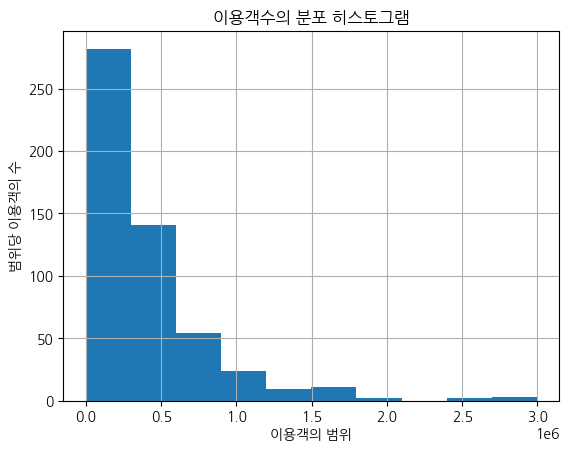

In [82]:
# 이용객수의 분포를 히스포그램으로 시각화

plt.hist(value_list, bins=10)
plt.title('이용객수의 분포 히스토그램')
plt.grid(True)
plt.xlabel('이용객의 범위')
plt.ylabel('범위당 이용객의 수')
                
plt.show()

### 과제2번
: "Bonston House Prices" 데이터셋을 사용
- 주택 가격의 평균
- 주택 가격의 중앙값
- 주택 가격의 표준편차
- 주택 가격의 최댓값
- 주택 가격의 최솟값
- 주택 가격의 최빈값
- 주택 가격의 분포 시각화

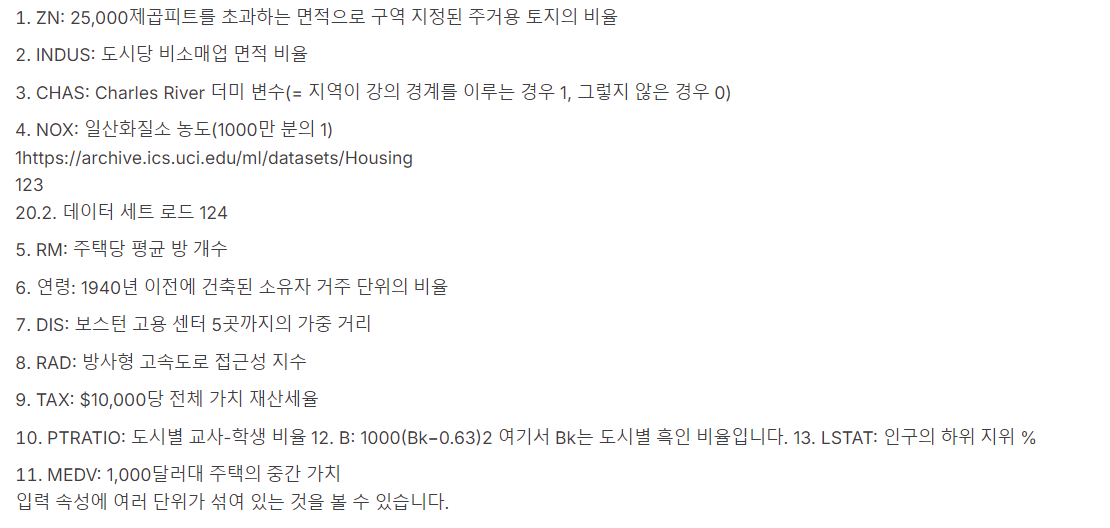

In [71]:
# delim_whitespace = True

In [72]:
data_df = pd.read_csv('../data/boston.csv', encoding='utf-8')
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [74]:
# 주택 가격은 'MEDV' 인가? 'TAX'인가?
price_list = data_df['MEDV'].to_list()
print(price_list)

[24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20.0, 16.6, 14.4, 19.4, 19.7, 20.5, 25.0, 23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16.0, 22.2, 25.0, 33.0, 23.5, 19.4, 22.0, 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20.0, 20.8, 21.2, 20.3, 28.0, 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 22.0, 22.9, 25.0, 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22.0, 20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18.0, 14.3, 19.2, 19.6, 23.0, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14.0, 14.4, 13.4, 15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4, 17.0, 15.6, 13.1, 41.3, 24.3, 23.3, 27.0, 50.0, 50.0, 50.0, 22.7, 25.0, 50.

In [79]:
# 주택 가격의 평균
# 주택 가격의 중앙값
# 주택 가격의 표준편차
# 주택 가격의 최댓값
# 주택 가격의 최솟값
# 주택 가격의 최빈값

price_mean = data_df['MEDV'].mean()
price_median = data_df['MEDV'].median()
price_std = data_df['MEDV'].std()
price_max = data_df['MEDV'].max()
price_min = data_df['MEDV'].min()
price_mode = data_df['MEDV'].mode()

print(f"주택 가격의 평균: {price_mean:.2f}")
print(f"주택 가격의 중앙값: {price_median}")
print(f"주택 가격의 표준편차: {price_std:.2f}")
print(f"주택 가격의 최댓값: {price_max}")
print(f"주택 가격의 최솟값: {price_min}")
print(f"주택 가격의 최빈값: {price_mode[0]}")

주택 가격의 평균: 22.53
주택 가격의 중앙값: 21.2
주택 가격의 표준편차: 9.20
주택 가격의 최댓값: 50.0
주택 가격의 최솟값: 5.0
주택 가격의 최빈값: 50.0


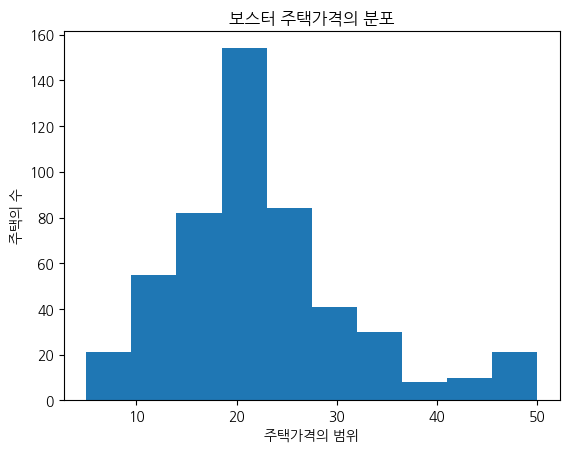

In [85]:
# 주택 가격 분포의 시각화
plt.hist(price_list, bins=10)
plt.title('보스터 주택가격의 분포')
plt.xlabel('주택가격의 범위')
plt.ylabel('주택의 수')

plt.show()